This dataset was taken from <a href="https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data">Kaggle</a>

In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#import chart_studio.plotly as py

sns.set_style('darkgrid')
%matplotlib inline

In [3]:
#from plotly import __version__
#import cufflinks as cf
#from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
#init_notebook_mode(connected=True)

In [4]:
#cf.go_offline()

In [5]:
table = pd.read_csv('AB_NYC_2019.csv')

In [6]:
df = table.copy()
del table

In [7]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [10]:
df.shape # We have 16 features and 48895 entries

(48895, 16)

In [11]:
df.isna().sum() #We have a lot of NaN values in "last_review" and "reviews_per_month"

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [12]:
# Let's check the "name" column, to see how to deal with these NaN values
# We will do a value_counts()
df.name.value_counts() # It seems "name" is just a simple description of the AirBnB, so we can change it to: "No Description"

Hillside Hotel                                      18
Home away from home                                 17
New york Multi-unit building                        16
Brooklyn Apartment                                  12
Private Room                                        11
                                                    ..
Room in the best location in the Lower East Side     1
1 Large Bedroom plus 2nd bed                         1
Idyllic Studio in Williamsburg                       1
The Rosedale Palace Master room                      1
Private BR in 3 BR Apt - E. Harlem                   1
Name: name, Length: 47905, dtype: int64

In [13]:
# Let's check the "host_name" column
df.host_name.value_counts() # It seems it is just the name of the person, so we can fill it with: "No Name"

Michael           417
David             403
Sonder (NYC)      327
John              294
Alex              279
                 ... 
Kate And Jason      1
Pristine Posh       1
Andres Mekos        1
Donalda             1
Sava                1
Name: host_name, Length: 11452, dtype: int64

In [14]:
# Let's check the "last_review" column
df.last_review.value_counts() # It seems it is just the date, we can change it to: "No Date"

2019-06-23    1413
2019-07-01    1359
2019-06-30    1341
2019-06-24     875
2019-07-07     718
              ... 
2012-01-03       1
2014-05-29       1
2015-01-21       1
2014-04-20       1
2015-01-15       1
Name: last_review, Length: 1764, dtype: int64

In [15]:
# Let's check the "reviews_per_month" column
df.reviews_per_month.value_counts() # This is a numeric column, we can fill this column with either the mean or 0

0.02     919
0.05     893
1.00     893
0.03     804
0.16     667
        ... 
10.23      1
8.94       1
6.04       1
9.21       1
10.67      1
Name: reviews_per_month, Length: 937, dtype: int64

In [16]:
# Fill NaN values in our dataset
df.name.fillna(value='No Description',inplace=True)
df.host_name.fillna(value='No Name',inplace=True)
#df.last_review.fillna(value='0000-00-00',inplace=True)
df.reviews_per_month.fillna(value=0,inplace=True)

In [17]:
df.isna().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

# EDA

In [18]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [19]:
df.price.value_counts()

100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
463        1
266        1
453        1
1306       1
1749       1
Name: price, Length: 674, dtype: int64

<AxesSubplot:xlabel='price'>

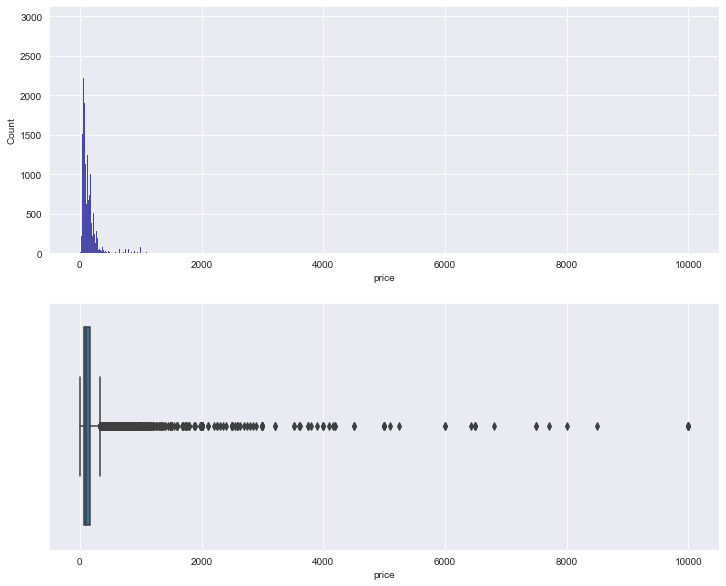

In [20]:
fig, ax = plt.subplots(2,1,figsize=(12,10)) 
sns.histplot(ax=ax[0],data=df.price,color='darkblue')
sns.boxplot(ax=ax[1],data=df,x='price')

It look like we have too many outliers in our `price` column, we should get rid of those, so we can visualize the distribution in a better way. We can do this by using the `z score` or defining a value by looking at the distribution plot above.
We will use the `z score`

In [21]:
def z_score_red(data,column,threshold=3):
    '''
    Reduce dataset size by the z score of a certain column
    
    data : pandas.Dataframe
    
    column : string 
             Column from where to obtain Z Score
    
    threshold : int, default = 3
                Number from where to filter with Z Score
    
    '''
    z = np.abs(stats.zscore(data[column]))
    
    return data[z < threshold]

df = z_score_red(df,'price')

We have reduced the size of our dataset, let's see if we got rid of those outliers in our `price` column by plotting the distribution again and using the `neighbourhood_group` as hue, so we can observe in one plot which neighbourhood is the most expensive, we will do this numerically as well

<AxesSubplot:xlabel='price'>

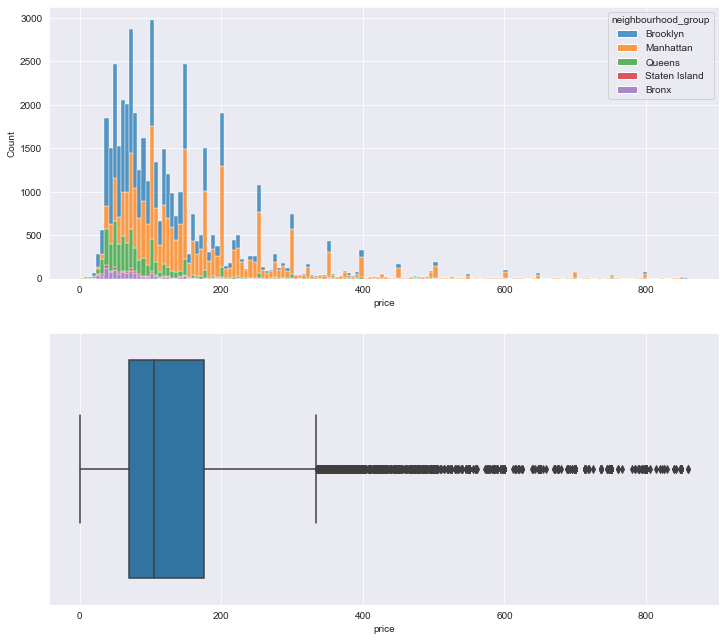

In [22]:
fig, ax = plt.subplots(2,1,figsize=(12,11)) 

sns.histplot(ax=ax[0],data=df,x=df.price,color='darkblue',hue='neighbourhood_group',multiple="stack")
sns.boxplot(ax=ax[1],data=df,x='price')
# It seems Manhattan is the most expensive place for an AirBnB, we can check that numerically with pandas.groupby()

Even though we still have outliers, we can clearly see our boxplot now

In [23]:
#df2 = df.copy()
#df2["Man"]=df2[df2["neighbourhood_group"]=="Manhattan"]["price"]
#df2["Bro"]=df2[df2["neighbourhood_group"]=="Brooklyn"]["price"]
#df2[["Man","Bro"]].iplot(kind="histogram", theme="white", title="Passenger's Ages",xTitle='Price', yTitle='Count',)

In [24]:
df.groupby('neighbourhood_group').price.mean()

neighbourhood_group
Bronx             84.443526
Brooklyn         116.524376
Manhattan        174.859762
Queens            94.104779
Staten Island     96.148649
Name: price, dtype: float64

As we had observed in our plot, Manhattan is indeed the most expensive one out of the 5 neighbourhoods in `neighbourhood_group`

Let's take a look at `minimum_nights`

In [25]:
df.minimum_nights.value_counts(), df.minimum_nights.unique()

(1      12571
 2      11635
 3       7953
 30      3721
 4       3282
        ...  
 39         1
 185        1
 198        1
 134        1
 366        1
 Name: minimum_nights, Length: 108, dtype: int64,
 array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
          29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
          50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
          44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
         370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
          70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
          23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         160,   47,  999,  186,  366,   68,   99,   93,   87,  183,  299,
         175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
         153,  134,  222,   58,  210,  275,  182,   85,   36], dtype=int64))

We can see that we have really abnormal values in this column, such as 1250,1000, etc. There must have been a problem while capturing these numbers. We can change these values to something more normal, such as 14 minimum nights, we can use the column's mean or just top minimum nights to a whole month, but we need to define a threshold to filter these values, our threshold will be 30 nights, something beyond that will be changed to the column's mean or whatever number we decide

We will plot the distribution after that transformation

In [26]:
df.loc[df.minimum_nights >= 30, 'minimum_nights'] = 30

In [27]:
df.minimum_nights.unique()

array([ 1,  3, 10, 30,  2,  5,  4,  7, 14, 29,  9,  6, 15,  8, 26, 28, 17,
       21, 11, 25, 13, 27, 18, 20, 19, 16, 12, 24, 22, 23], dtype=int64)

<AxesSubplot:>

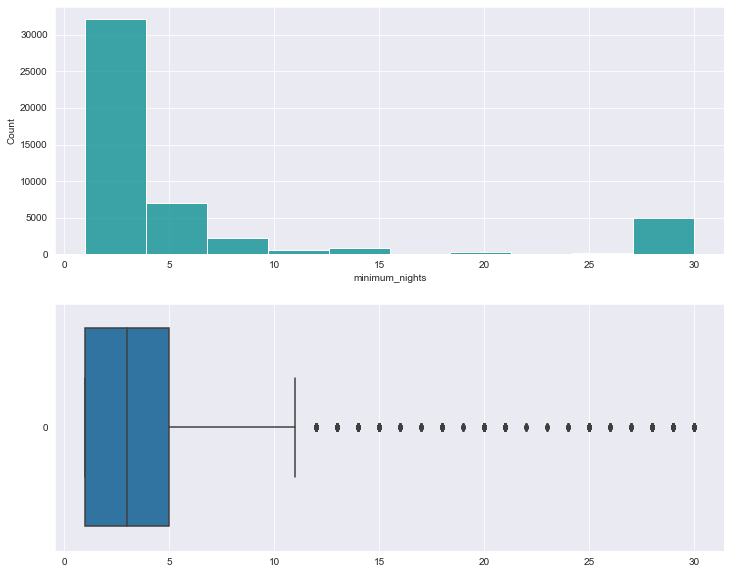

In [28]:
fig, ax = plt.subplots(2,1,figsize=(12,10)) 
sns.histplot(ax=ax[0],data=df.minimum_nights,color='darkcyan',bins=10)
sns.boxplot(ax=ax[1],data=df.minimum_nights,orient='h')

We can check the `minimum_nights` in each `neighbourhood_group`, we can do this graphically and numerically

neighbourhood_group
Bronx            3.551882
Brooklyn         5.177872
Manhattan        7.169427
Queens           4.591327
Staten Island    3.908108
Name: minimum_nights, dtype: float64

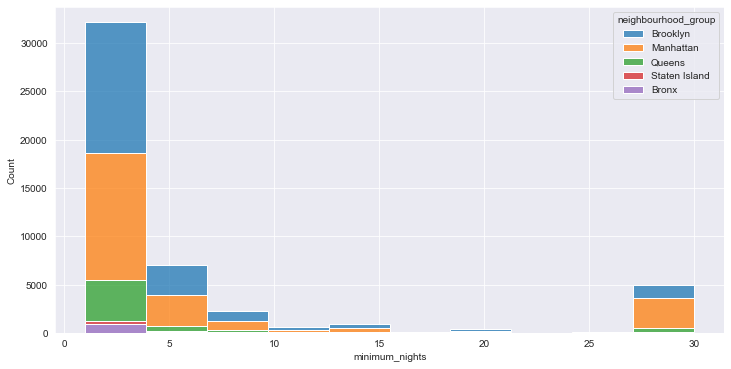

In [29]:
plt.figure(figsize=(12,6))
sns.histplot(data=df,x='minimum_nights',color='darkcyan',hue='neighbourhood_group',multiple='stack',bins=10)
df.groupby('neighbourhood_group').minimum_nights.mean()

Manhattan is the place with the highest `minimum_nights`, with an average of 7 nights, which is a one week stay


We can also see how the AirBnB's are distributed within NYC

In [30]:
# Geographical plotting
BBox = ((df.longitude.min(),   df.longitude.max(),      
         df.latitude.min(), df.latitude.max()))
nyc_map = plt.imread('map.png')

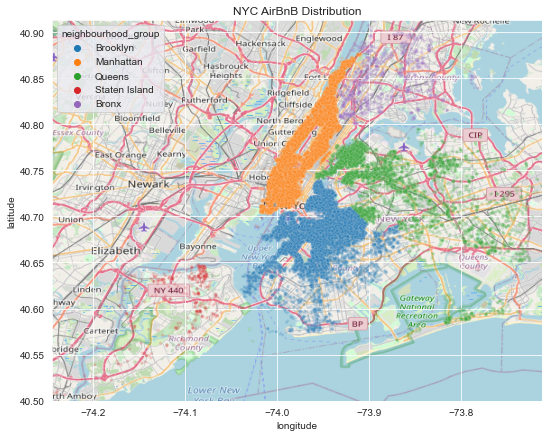

In [31]:
plt.figure(figsize = (12,7))
sns.scatterplot(data=df,x='longitude',y='latitude',alpha= 0.2, c='b', s=10,hue='neighbourhood_group')
plt.title('NYC AirBnB Distribution')
plt.xlim(BBox[0],BBox[1])
plt.ylim(BBox[2],BBox[3])
plt.imshow(nyc_map, zorder=0, extent = BBox)

We can see that we have more AirBnB's in Manhattan and Brooklyn

Let's see what type of `room_type` does most AirBnB's in NYC have

In [32]:
df.room_type.value_counts()

Entire home/apt    25102
Private room       22249
Shared room         1156
Name: room_type, dtype: int64

We have more home/apt, let's see the estimation of each within our `neighbourhood_group` column

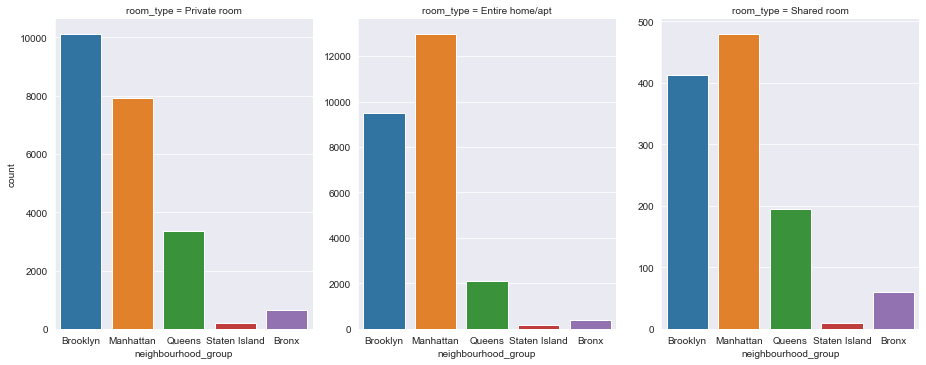

In [33]:
g = sns.catplot(x="neighbourhood_group", col="room_type", col_wrap=4,
                data=df,
                kind="count",height=5, aspect=.85,sharey=False)

Brooklyn has more private rooms, while Manhattan has more entire home/apt

We can also look at them in a NYC map, there are so few 'Shared rooms' that we may not be able to see them

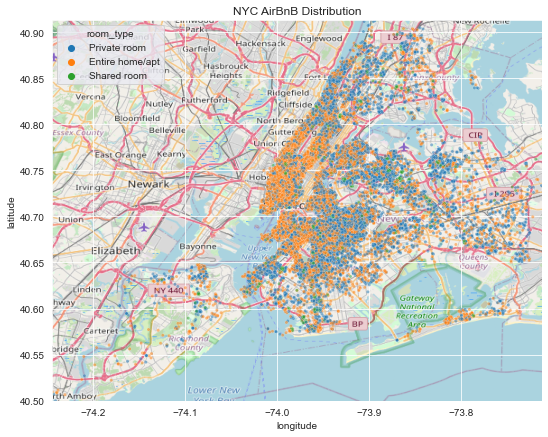

In [34]:
plt.figure(figsize = (12,7))
sns.scatterplot(data=df,x='longitude',y='latitude',alpha= 0.5, c='b', s=10,hue='room_type')
plt.title('NYC AirBnB Distribution')
plt.xlim(BBox[0],BBox[1])
plt.ylim(BBox[2],BBox[3])
plt.imshow(nyc_map, zorder=0, extent = BBox)

We can also check what `room_type` is more expensive

In [35]:
df.groupby('room_type').price.mean()

room_type
Entire home/apt    191.036611
Private room        83.531709
Shared room         66.001730
Name: price, dtype: float64

An entire home/apartment is more expensive than a private room or shared room, which makes sense

Let's check the distribution of `reviews_per_month` and see if a certain `room_type` has more reviews than the others

In [36]:
df.reviews_per_month.value_counts()

0.00     9860
0.02      913
0.05      890
1.00      883
0.03      798
         ... 
10.23       1
8.94        1
6.04        1
9.21        1
10.67       1
Name: reviews_per_month, Length: 938, dtype: int64

<AxesSubplot:xlabel='reviews_per_month'>

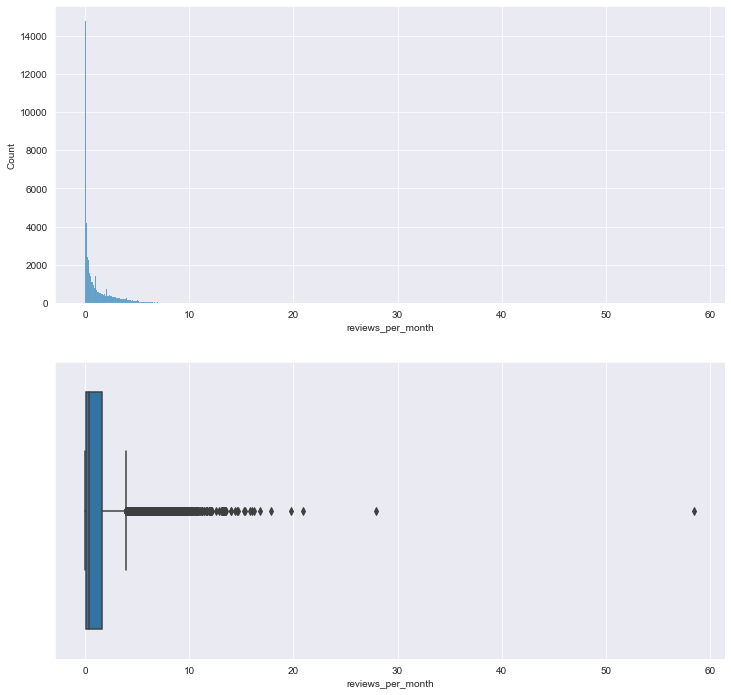

In [37]:
fig,ax = plt.subplots(2,1,figsize=(12,12))
sns.histplot(ax=ax[0],data=df,x='reviews_per_month')
sns.boxplot(ax=ax[1],data=df,x='reviews_per_month')

It seem we have too many outliers in `reviews_per_month`, we should drop the so we can get a clear view at the distribution

In [38]:
print(df.shape)
df = z_score_red(df,'reviews_per_month')
print(df.shape)

(48507, 16)
(47667, 16)


We got rid off like 800 samples from our dataset, which is not too many

<AxesSubplot:xlabel='reviews_per_month'>

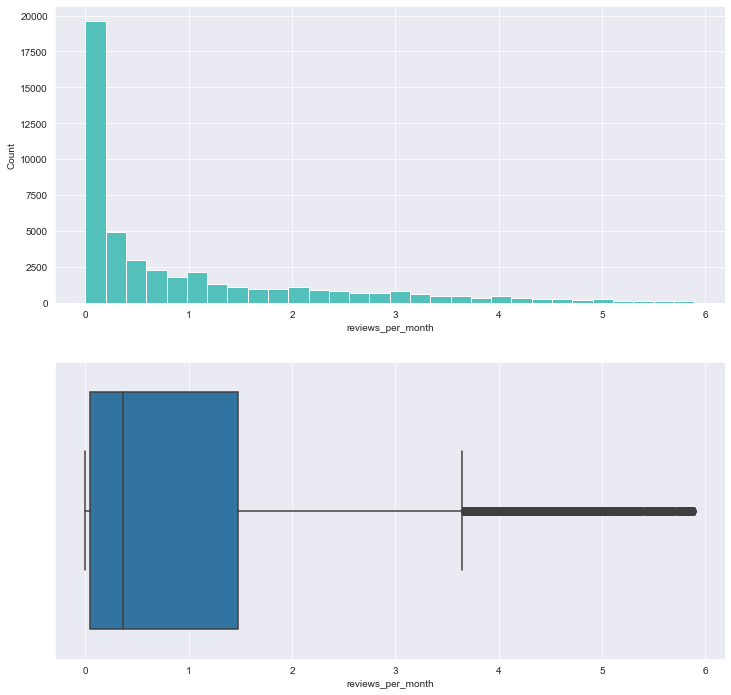

In [39]:
fig,ax = plt.subplots(2,1,figsize=(12,12))
sns.histplot(ax=ax[0],data=df,x='reviews_per_month',bins=30,color='lightseagreen')
sns.boxplot(ax=ax[1],data=df,x='reviews_per_month')

In [40]:
df.groupby('room_type').reviews_per_month.mean()

room_type
Entire home/apt    0.967796
Private room       0.992650
Shared room        0.963495
Name: reviews_per_month, dtype: float64

We can see that there isn't that much difference in the mean of `reviews_per_month` in each `room_type`. But we can check for if there's a difference in `reviews_per_month` based on `neighbourhood_group` and `price`

In [41]:
df.groupby('neighbourhood_group').reviews_per_month.mean()

neighbourhood_group
Bronx            1.354400
Brooklyn         0.972553
Manhattan        0.890468
Queens           1.243107
Staten Island    1.445967
Name: reviews_per_month, dtype: float64

It seems there isn't a `neighbourhood_group` that has more `reviews_per_month`, they seem to behave almost the same

Let's do a `sns.scatterplot()` to look for a relationship within `reviews_per_month`  and `price`

<AxesSubplot:xlabel='reviews_per_month', ylabel='price'>

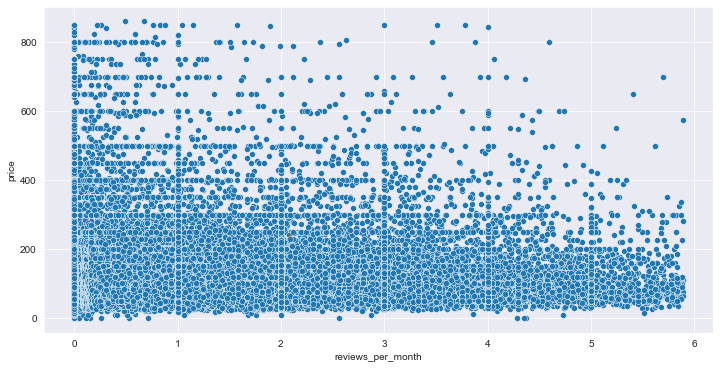

In [42]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='reviews_per_month',y='price')

Looks like there isn't a direct relationship between `reviews_per_month` and `price`

Let's do a correlation matrix and see if there's any correlated columns

<AxesSubplot:>

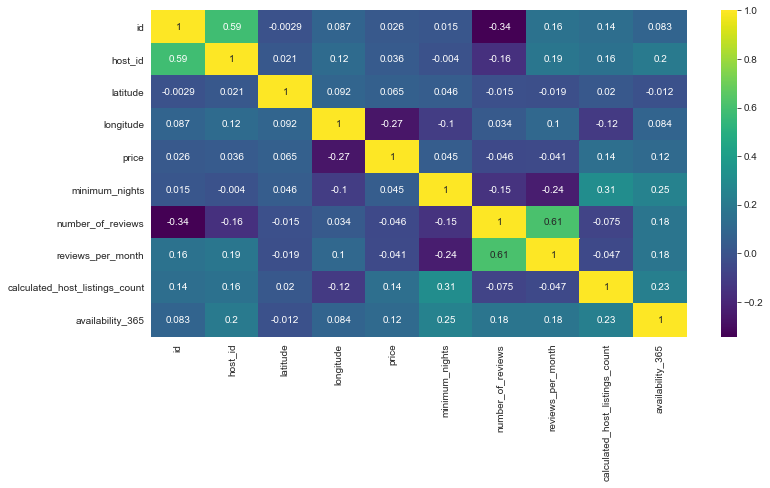

In [43]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),cmap='viridis',annot=True)

# Modeling

We will first use a `LinearRegression`, and fit it only to the numerical data, and see how good our model is. If needed we will perform feature engineering and hyperparameter tuning. If `LinearRegression` does not do a good job in understanding our data, we will use other models.

In [44]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [45]:
df_final = df.drop(['id', 'name', 'host_id', 'host_name','last_review'],axis=1)

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression,LassoCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import metrics

In [47]:
class Linear(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.scaler = StandardScaler()
        self.model = LinearRegression()
        self.mae = None
        self.mse = None
        self.rmse = None
        self.r2 = None
        
    def fit(self,X,y,scaled=False):
        X = self.scaler.fit_transform(X)
        self.model.fit(X,y)
    
    def _coef(self):
        print("\n")
        return print("These are the model coefficients",self.model.coef_)
    
    def predict(self,X):
        X = self.scaler.transform(X)
        
        return self.model.predict(X)
    
    def _residuals(self,y_true,y_pred,_set):
        print("\n")
        print("These are the residuals for the "+_set)
        print("\n")
        fig,ax = plt.subplots(1,2,figsize=(15,6))
        sns.histplot((y_true-y_pred),ax=ax[0],bins=50)
        ax[1] = plt.scatter(y_true,y_pred,edgecolors="white")
        plt.xlabel('Y Test')
        plt.ylabel('Predicted Y')
        
        
    def _metrics(self,y_true,y_pred,_set):
        self.mae = metrics.mean_absolute_error(y_true, y_pred)
        self.mse = metrics.mean_squared_error(y_true, y_pred)
        self.rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
        self.r2 = metrics.r2_score(y_true, y_pred)
        print("\n")
        print("These are the metrics for the "+_set)
        print('MAE:', self.mae)
        print('MSE:', self.mse)
        print('RMSE:', self.rmse)
        print('R2_score:', self.r2)
        

In [48]:
df_final.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [49]:
X = df_final.drop(["price","neighbourhood_group","room_type","neighbourhood"],axis=1)
y = df_final['price']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



These are the model coefficients [ 10.07709    -30.74170695  -7.42872181  -5.53637484  -1.63415909
  10.09656673  16.04369429]


These are the metrics for the training set
MAE: 69.06710401986643
MSE: 10346.192002308175
RMSE: 101.71623273749464
R2_score: 0.1135893598739598


These are the residuals for the training set




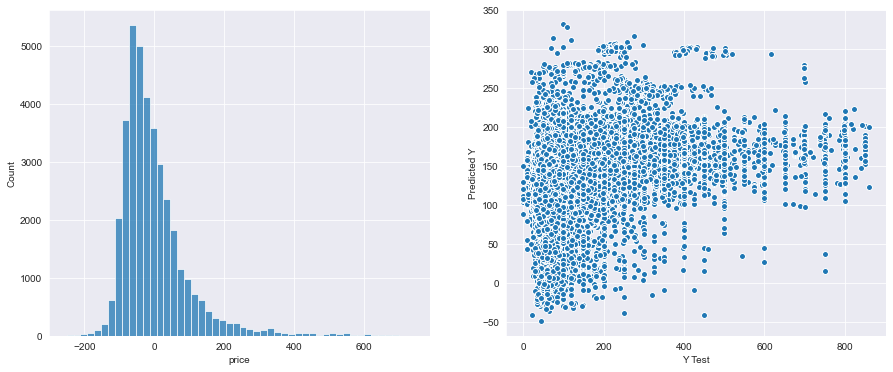

In [51]:
Linear_Model = Linear()
Linear_Model.fit(X_train,y_train)
Linear_Model._coef()
y_pred_train = Linear_Model.predict(X_train)
Linear_Model._metrics(y_train,y_pred_train,"training set")
Linear_Model._residuals(y_train,y_pred_train,"training set")

Looks like we have a R^2 of : {{Linear_Model.r2}} and a RMSE of : {{Linear_Model.rmse}}, which is very bad, let's see if doing some feature engineering and droping some columns we can do better. 

Let's see if droping `latitude`,`longitude` and encoding `neighbourhood_group`, `neighbourhood` and `room_type` we can obtain a better performance

In [52]:
df_final_encoded_2 = pd.get_dummies(df_final, columns=['neighbourhood_group',"neighbourhood","room_type"], 
                                 prefix = ['ng_g',"ng","rt"],drop_first=True)
df_final_encoded_2.drop(['latitude','longitude'],axis=1,inplace=True)

Instead of using `LinearRegression`, we will use `LassoCV`, after that we can test other models to improve performance

Let's first create our class for our `LassoCV`

In [53]:
class Lasso_CV(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        self.scaler = StandardScaler()
        # define model evaluation method
        cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
        # define model
        self.model = LassoCV(alphas=np.arange(0, 1, 0.01), cv=cv, n_jobs=-1)
        self.mae = None
        self.mse = None
        self.rmse = None
        self.r2 = None
        
    def fit(self,X,y,scaled=False):
        X = self.scaler.fit_transform(X)
        self.model.fit(X,y)
    
    def _coef(self):
        print("\n")
        print("These are the model coefficients",self.model.coef_)
        print('alpha: %f' % self.model.alpha_)
    
    def predict(self,X):
        X = self.scaler.transform(X)
        
        return self.model.predict(X)
    
    def _residuals(self,y_true,y_pred,_set):
        print("\n")
        print("These are the residuals for the "+_set)
        print("\n")
        fig,ax = plt.subplots(1,2,figsize=(15,6))
        sns.histplot((y_true-y_pred),ax=ax[0],bins=50)
        ax[1] = plt.scatter(y_true,y_pred,edgecolors="white")
        plt.xlabel('Y Test')
        plt.ylabel('Predicted Y')
        
        
    def _metrics(self,y_true,y_pred,_set):
        self.mae = metrics.mean_absolute_error(y_true, y_pred)
        self.mse = metrics.mean_squared_error(y_true, y_pred)
        self.rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
        self.r2 = metrics.r2_score(y_true, y_pred)
        print("\n")
        print("These are the metrics for the "+_set)
        print('MAE:', self.mae)
        print('MSE:', self.mse)
        print('RMSE:', self.rmse)
        print('R2_score:', self.r2)        

In [54]:
X2 = df_final_encoded_2.drop("price",axis=1)
y2 = df_final_encoded_2["price"]

In [55]:
X2.shape

(47667, 231)

In [56]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.20, random_state=42)



These are the metrics for the train set
MAE: 51.03467034183466
MSE: 6956.901067051446
RMSE: 83.40803958283306
R2_score: 0.40396707051610325


These are the residuals for the train set




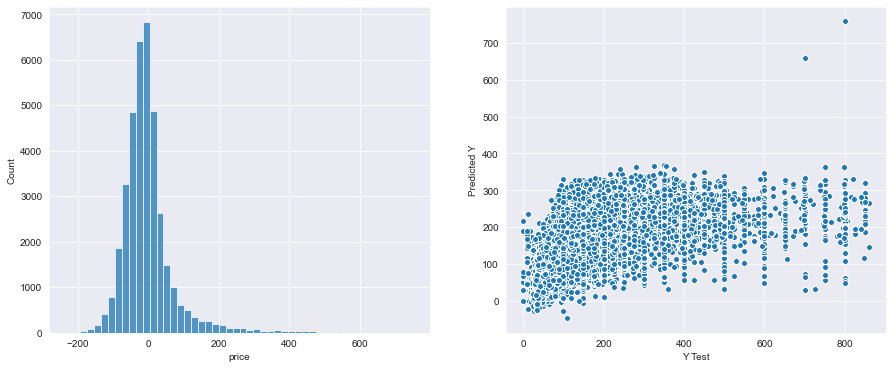

In [57]:
Lasso_Model_Encoded = Lasso_CV()
Lasso_Model_Encoded.fit(X_train2,y_train2)
#Lasso_Model_Encoded._coef()
y_pred_train = Lasso_Model_Encoded.predict(X_train2)
Lasso_Model_Encoded._metrics(y_train2,y_pred_train,"train set")
Lasso_Model_Encoded._residuals(y_train2,y_pred_train,"train set")

Our `LassoCV` has an alpha of {{Lasso_Model_Encoded.model.alpha_}}, a R^2 of {{Lasso_Model_Encoded.r2}} and a RMSE of {{Lasso_Model_Encoded.rmse}} in our training set, it is a really big improvement.

In [58]:
coeffecients = pd.DataFrame(Lasso_Model_Encoded.model.coef_,X2.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
minimum_nights,-14.902126
number_of_reviews,-5.973219
reviews_per_month,-2.879787
calculated_host_listings_count,3.286017
availability_365,18.215819
...,...
ng_Woodlawn,-0.201050
ng_Woodrow,2.731955
ng_Woodside,0.382866
rt_Private room,-45.880688


We can see that model improved, meaning our selection of features is correct but we just a need a model that can generalize better on our data, we could use a `DecisionTree` or `RandomForest`.
And maybe we could add another feature, if our next model does not work better than the `LassoCV`

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
class RF(BaseEstimator, TransformerMixin):
    
    def __init__(self,estimators):
        self.scaler = StandardScaler()
        # define model evaluation method
        #"cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
        # define model
        self.model = RandomForestRegressor(n_estimators=estimators)
        self.mae = None
        self.mse = None
        self.rmse = None
        self.r2 = None
        
    def fit(self,X,y,scaled=False):
        X = self.scaler.fit_transform(X)
        self.model.fit(X,y)
    
    def _coef(self):
        print("\n")
        print("These are the model feature importances",self.model.feature_importances_)
       
    
    def predict(self,X):
        X = self.scaler.transform(X)
        
        return self.model.predict(X)
    
    def _residuals(self,y_true,y_pred,_set):
        print("\n")
        print("These are the residuals for the "+_set)
        print("\n")
        fig,ax = plt.subplots(1,2,figsize=(15,6))
        sns.histplot((y_true-y_pred),ax=ax[0],bins=50)
        ax[1] = plt.scatter(y_true,y_pred,edgecolors="white")
        plt.xlabel('Y Test')
        plt.ylabel('Predicted Y')
        
        
    def _metrics(self,y_true,y_pred,_set):
        self.mae = metrics.mean_absolute_error(y_true, y_pred)
        self.mse = metrics.mean_squared_error(y_true, y_pred)
        self.rmse = np.sqrt(metrics.mean_squared_error(y_true, y_pred))
        self.r2 = metrics.r2_score(y_true, y_pred)
        print("\n")
        print("These are the metrics for the "+_set)
        print('MAE:', self.mae)
        print('MSE:', self.mse)
        print('RMSE:', self.rmse)
        print('R2_score:', self.r2)  



These are the metrics for the train set
MAE: 20.97681979329688
MSE: 1458.7721502878962
RMSE: 38.19387582175834
R2_score: 0.8750196057403287


These are the residuals for the train set




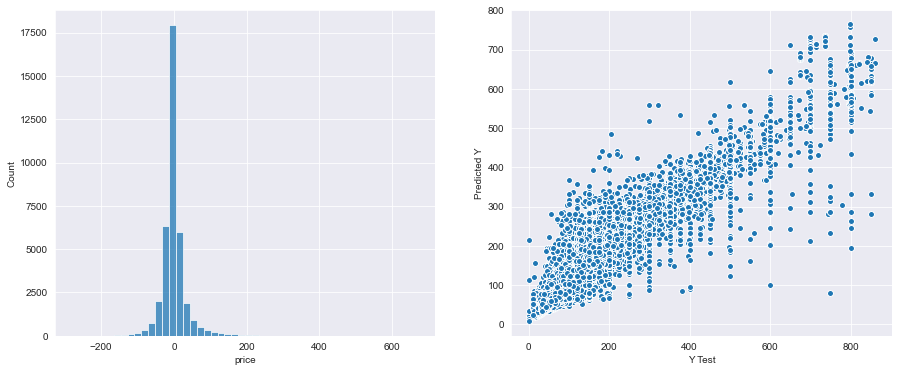

In [61]:
RF_Model_Encoded = RF(100)
RF_Model_Encoded.fit(X_train2,y_train2)
#RF_Model_Encoded._coef()
y_pred_train = RF_Model_Encoded.predict(X_train2)
RF_Model_Encoded._metrics(y_train2,y_pred_train,"train set")
RF_Model_Encoded._residuals(y_train2,y_pred_train,"train set")

We got a R^2 of :{{RF_Model_Encoded.r2}} and a RMSE of :{{RF_Model_Encoded.rmse}}, which is very good

Let's use the test set and predict using our model



These are the metrics for the test set
MAE: 49.029345871067335
MSE: 6848.023346201737
RMSE: 82.75278452234545
R2_score: 0.40474606313679307


These are the residuals for the test set




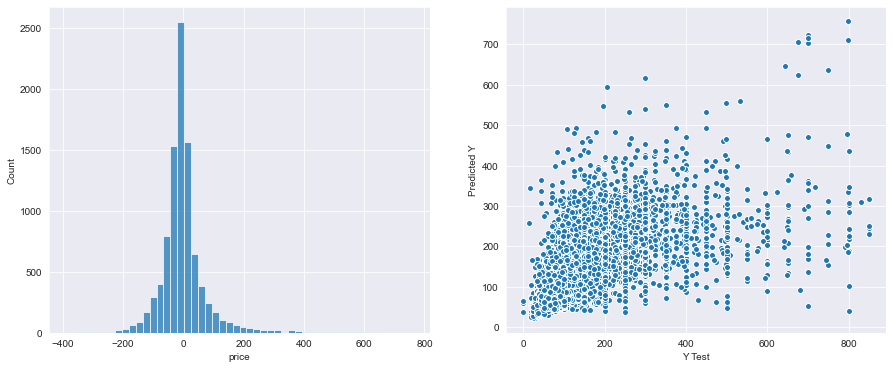

In [62]:
y_pred_test = RF_Model_Encoded.predict(X_test2)
RF_Model_Encoded._metrics(y_test2,y_pred_test,"test set")
RF_Model_Encoded._residuals(y_test2,y_pred_test,"test set")